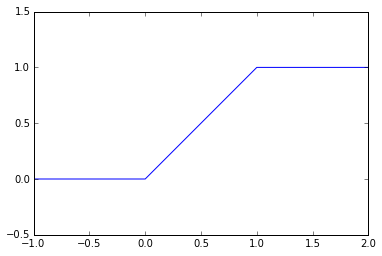

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

"""Continuous Distributions of Random Variables"""


def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0


def uniform_cdf(x):
    '''returns the probability that a uniform random variable is < x'''
    if x < 0:   return 0
    elif x < 1: return x
    else:       return 1

xs = [x / 10.0 for x in range(-10, 21)]
plt.plot(xs, [uniform_cdf(x) for x in xs])
plt.axis((-1, 2, -.5, 1.5))
plt.show()


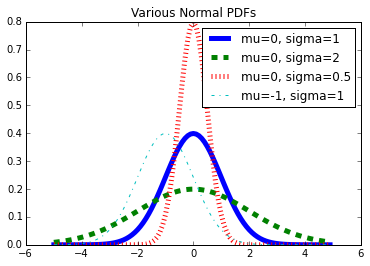

In [16]:
from math import exp, pi, sqrt

def normal_pdf(x, mu=0, sigma=1.0):
    '''Gaussian PDF'''
    sqrt_two_pi = sqrt(2 * pi)
    return exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma)


xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1', linewidth=5)
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2', linewidth=5)
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5', linewidth=5)
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal PDFs")
plt.show()


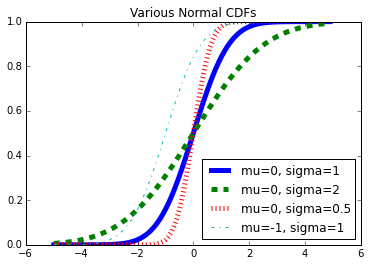

In [15]:
from math import erf

def normal_cdf(x, mu=0, sigma=1):
    return (1 + erf((x - mu) / sqrt(2) / sigma)) / 2


xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1', linewidth=5)
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2', linewidth=5)
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5', linewidth=5)
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal CDFs")
plt.show()


In [17]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z
